# Data Cleaning
# various filtering algorithms to analyse and filter out points of fish data along with timestamps

### Import necessary libraries
### These libraries are essential for data manipulation, filtering, and visualization.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift

### Define filtering function
### The following function applies a bandpass filter to clean the data by removing unwanted frequencies.


In [2]:
from scipy.signal import butter, filtfilt

def butter_bandpass_filter(data, cutoff_low, cutoff_high, sampling_rate, order):
    nyq = 0.5 * sampling_rate  # Nyquist Frequency
    normal_cutoff_low = cutoff_low / nyq
    normal_cutoff_high = cutoff_high / nyq
    # Get the filter coefficients 
    b, a = butter(order, [normal_cutoff_low, normal_cutoff_high], btype='band')  #equivalent to: btype='bandpass'
    y = filtfilt(b, a, data)
    return y

In [3]:
measured_data = pd.read_csv('C:/Optimal Control/optitrap_alg_final/Levitator_Data/15optitrack_fish_3min.csv')


In [4]:
measured_time = measured_data['timestamp']
measured_data_y = measured_data['bead_y']
measured_data_y = measured_data_y*1000
measured_data_z = measured_data['bead_z']
measured_data_z = measured_data_z * 1000

# Extract and preprocess specific columns
# We select relevant columns (time, y, z positions), scaling data as necessary for analysis.


In [5]:
measured_time = measured_time[42718:,]    
measured_data_y = measured_data_y[42718:,] 
measured_data_z =measured_data_z[42718:,] 


# Slice the data
# Adjust the data range for further analysis. Modify this based on the range of interest for your experiment.


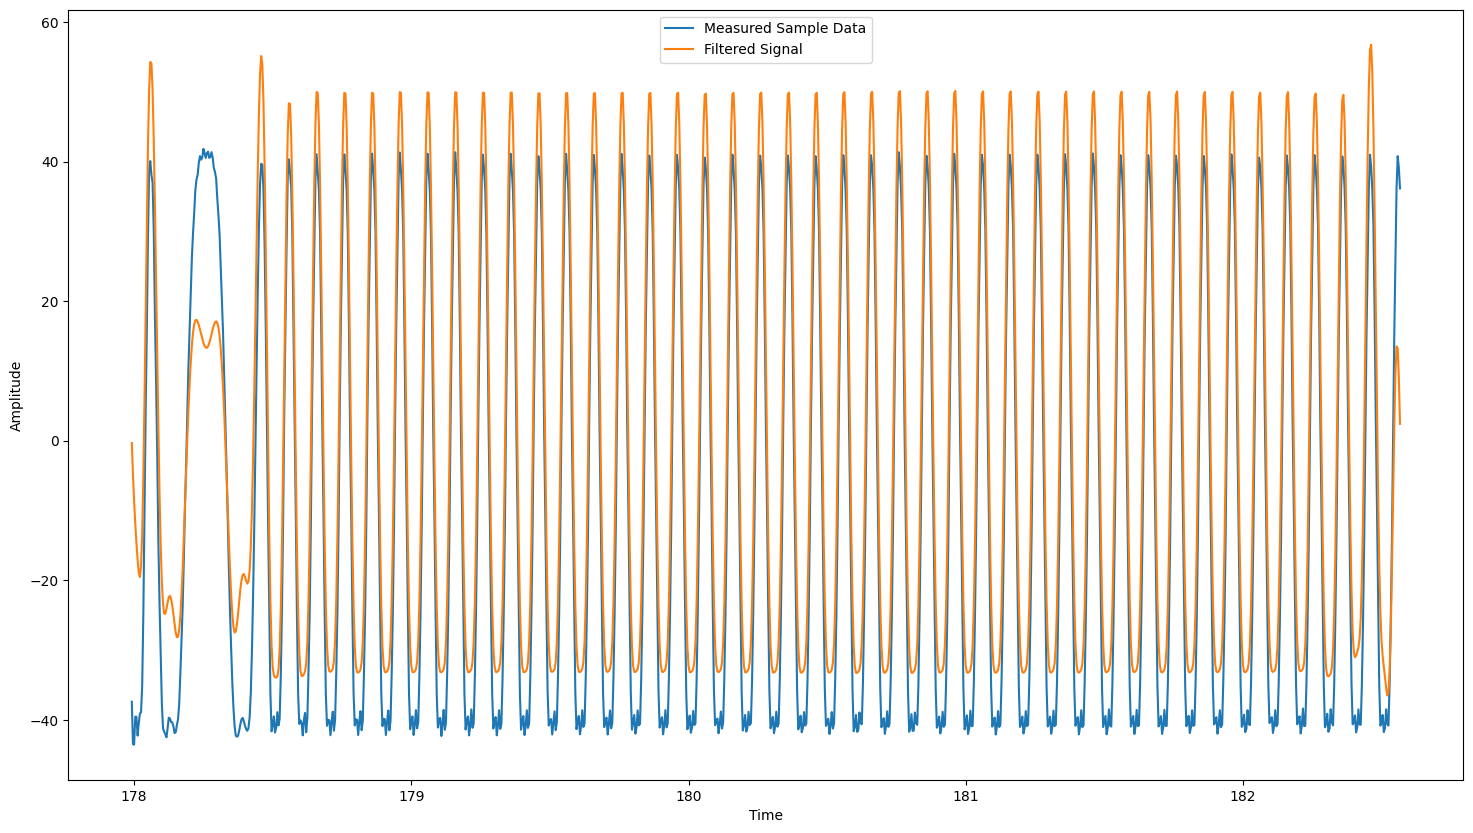

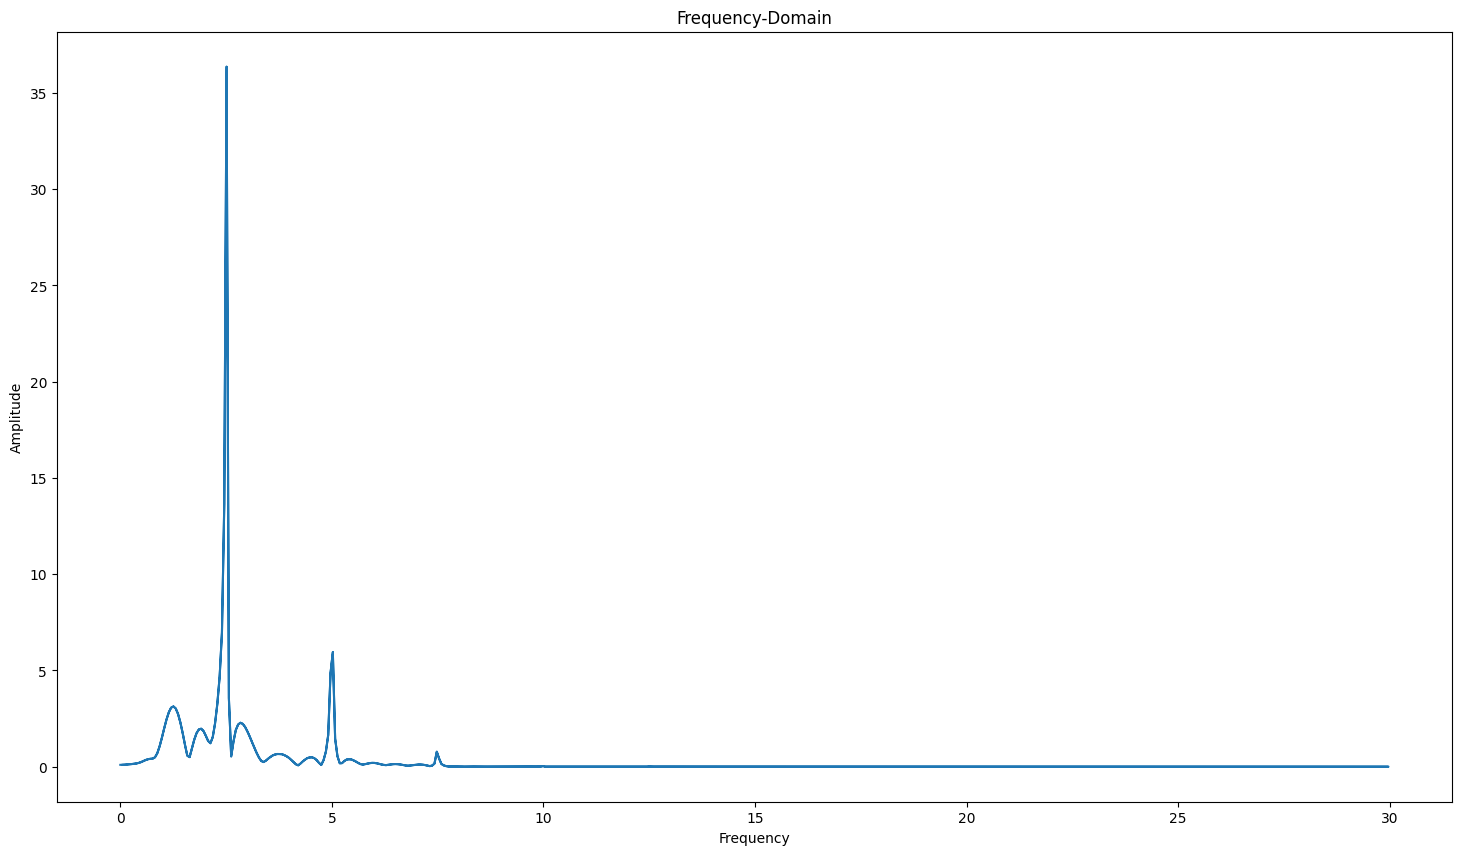

In [6]:



# Filter the data with the bandpass filter
sampling_rate = 60      # sample rate, Hz
cutoff_low = 1  # lower cutoff frequency of the bandpass filter, Hz
cutoff_high = 7  # upper cutoff frequency of the bandpass filter, Hz
order = 2       # sin wave can be approx represented as quadratic
y = butter_bandpass_filter(measured_data_y, cutoff_low, cutoff_high, sampling_rate, order)

# Plot the original and filtered signals
plt.figure(figsize = (18,10))
plt.plot(measured_time,measured_data_y, label='Measured Sample Data')
plt.plot(measured_time, y, label='Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Perform FFT on the data
fft_data = np.fft.fft(y)

# # Compute the frequency axis
sampling_rate = 60
amplitude = 2 / len(measured_time) * np.abs(fft_data)
frequency = np.fft.fftfreq(len(measured_data_y), d=1/sampling_rate)

plt.figure(figsize = (18,10))

plt.plot(np.abs(frequency), amplitude)
# plt.plot((frequency), amplitude)

plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency-Domain')
plt.show()



In [7]:
measured_data = pd.read_csv('C:/Optimal Control/optitrap_alg_final/Levitator_Data/15optitrack_fish_3min.csv')
measured_time = measured_data['timestamp']
measured_data_y = measured_data['bead_y']
# measured_data_y = measured_data_y*1000
measured_data_z = measured_data['bead_z']
# measured_data_z = measured_data_z * 1000

In [8]:
measured_time   = measured_time[77:101,]     #[1012:1037,] ,for 15optitrack]#[1011:2016,] 
measured_data_y = measured_data_y[77:101,] 
measured_data_z = measured_data_z[77:101,] 


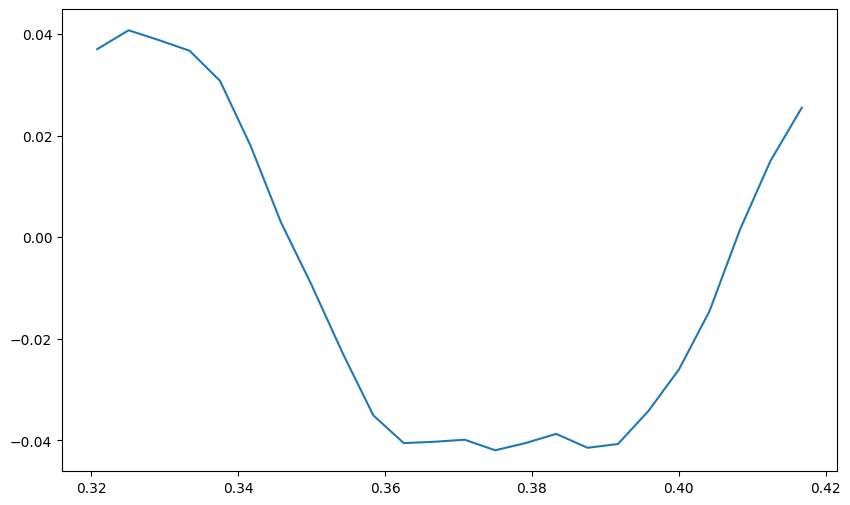

In [9]:
plt.figure(figsize = (10,6))
plt.plot(measured_time, measured_data_y, label='measured single cycle')


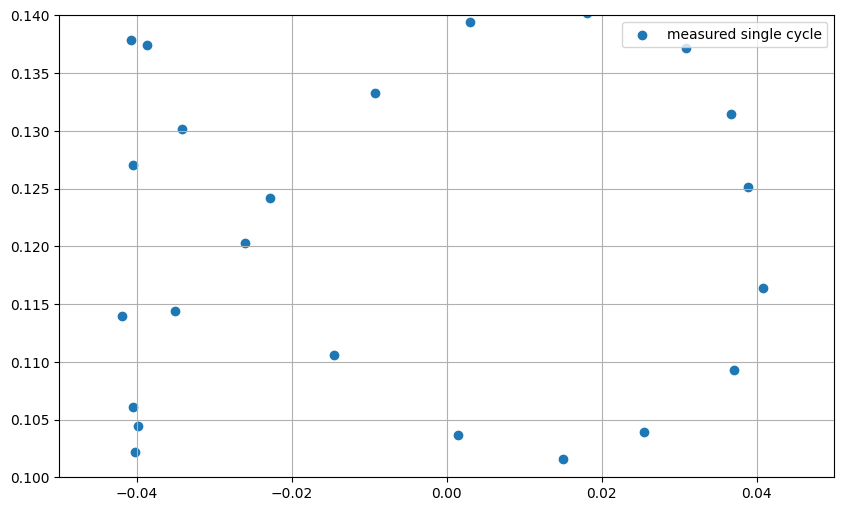

In [10]:
plt.figure(figsize = (10,6))
plt.scatter(measured_data_y, measured_data_z, label='measured single cycle')
plt.xlim(-0.05,0.05)
plt.ylim(0.1, 0.14)
plt.grid()
plt.legend()

In [12]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=measured_data_y, y=measured_data_z, mode='markers', text=filtered_df['timestamp']))
fig.update_layout(width=800, height=500)

fig.show()

NameError: name 'filtered_df' is not defined

In [ ]:
value1 = measured_data_y.iloc[322]
value2 = measured_data_y.iloc[82]

# Calculate the difference
time_difference = value2 - value1
time_difference

# Relevant

In [5]:
measured_data1 = pd.read_csv('C:/Optimal Control/optitrap_alg_final/Levitator_Data/15optitrack_fish_3min.csv')
# measured_data2 = pd.read_csv('C:/Optimal Control/optitrap_alg_final/Levitator_Data/20optitrack_fish_3min.csv')


# selecting periodic data range from the dataframe

In [ ]:
ranges_to_select = [
     (78, 1518), # Range 1:3
       (1639, 3079)  # Range 4:5
#     (3247,4687),
#       (4830, 6293),
#      (6414,7877),
#     (7974, 9390),
#      (9584,11022),
#      (11167,12630),
#     (12751,14191)
#     (14307 ,15799) #minimium timestamp in negative
#     (15913,17387),
#     (17484,18971),
#     (19068,20555),
#     (20652,22140),
#     (22236,23724),
#     (23821,25309),
#     (25405,26894)
#     (26990,28478),
#     (28574,30061),
#     (30158,31645),
#     (31743,33230),
#     (33327,34814),
#     (34911,36398),
#     (38080,39567),
#      (39664,41152),
#     (41248,42718),
#     (42832,43818)
   
]

In [ ]:
selected_data1 = pd.concat([measured_data1.iloc[start:end+1] for start, end in ranges_to_select])
# selected_data2 = pd.concat([measured_data2.iloc[start:end+1] for start, end in ranges_to_select])

# combined_data = pd.concat([selected_data1, selected_data2], ignore_index=True)

In [ ]:
#reset the timestamp to remove gaps and save before further performing offset calculations

In [ ]:
selected_data1 = pd.read_csv('C:/Users/nimav/OneDrive - Universität Bayreuth/Big Master Project/time w offset.csv')


In [ ]:
selected_data1.reset_index(drop=True, inplace=True)

In [ ]:
selected_data1.describe()

# Creating time with an offset

### Applying cursor algorithm


In [ ]:

# selected_data1['time_w_offset'] = selected_data1['timestamp']

# # Define the offset value
# offset_value = 0.10
# for i in range(24, len(selected_data1) // 24 + 1):
#     start_index = (i - 1) * 24
#     end_index = i * 24
#     selected_data1.loc[start_index:end_index, 'time_w_offset'] = selected_data1.loc[start_index:end_index, 'timestamp'] - i * offset_value
# print(selected_data1)


import pandas as pd

selected_data1['time_w_offset'] = selected_data1['timestamp']

interval_size = 24
offset = 0.1

selected_data1['time_w_offset'] = selected_data1['time_w_offset'] - (selected_data1.index // interval_size) * offset

print(selected_data1)



In [ ]:
selected_data1.to_csv('time w offset.csv')

In [3]:
selected_data1 = pd.read_csv('C:/Users/nimav/OneDrive - Universität Bayreuth/Big Master Project/time w offset.csv')


In [ ]:
# selected_data1['bead_y'] = selected_data1['bead_y'].apply(lambda x: float("{:.3f}".format(x)))
# selected_data1['bead_z'] = selected_data1['bead_z'].apply(lambda x: float("{:.3f}".format(x)))

# selected_data1

In [ ]:
# selected_data1.to_csv('time w offset.csv')

Text(0, 0.5, 'bead z')

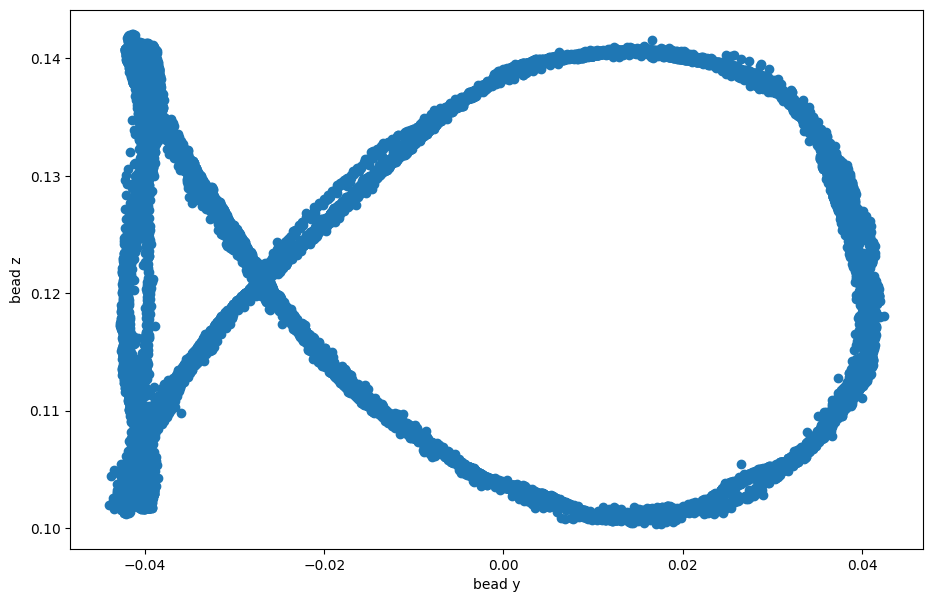

In [6]:
plt.figure(figsize = (11,7))
# Plot the original and filtered signals
plt.scatter(measured_data1['bead_y'], measured_data1['bead_z'])
# plt.xlim(-0.05,0.05)
# plt.ylim(0.098, 0.145)
plt.xlabel('bead y')
plt.ylabel('bead z')


In [ ]:
# filtered_df.to_csv('selected_data_1stpoints.csv')

In [ ]:
plt.figure(figsize = (11,7))
# Plot the original and filtered signals
plt.scatter(selected_data1.iloc[:5]['bead_y'], selected_data1.iloc[:5]['bead_z'], label='60 cycle with offset time')#s=10)
plt.xlim(-0.05,0.05)
plt.ylim(0.098, 0.145)
plt.legend()

In [ ]:
selected_data1.iloc[1439:1442]

In [ ]:
# measured_data_original = pd.read_csv('C:/Optimal Control/optitrap_alg_final/Levitator_Data/15optitrack_fish_3min.csv')


In [ ]:
### not anymore in use, because we are not checking all points together. we are checking 1st points for now

### check points using plotly

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
# fig.add_trace(go.Scatter(x=selected_data1['bead_y'], y=selected_data1['bead_z'], mode='markers', text=filtered_df['timestamp']))
fig = px.line(selected_data1, x="bead_y", y="bead_z", title='plotting 2*60 cycles')
fig.update_layout(width=800, height=500)
# fig.update_layout(xaxis_range=[-0.05,0.05])
# fig.update_layout(yaxis_range=[0.1,0.14])
fig.show()

In [ ]:
import pandas as pd

selected_data2['time_w_offset'] = 0.0  

offset_timestamp = selected_data2['timestamp'].head(24).values

for i in range(25, len(selected_data2)):
    selected_data2.iloc[i, selected_data2.columns.get_loc('time_w_offset')] =     (selected_data2.iloc[i, selected_data2.columns.get_loc('timestamp')] - offset_value * cycle_index)
    
    
    #(selected_data2.iloc[i, selected_data2.columns.get_loc('timestamp')] - offset_timestamp[i * 24])
# change 


In [ ]:
combined_data = pd.concat([selected_data1, selected_data2], ignore_index=True)

In [ ]:
0.002<0.0001


interpolation for 1st cycle of 24 points to be within 0.1 seconds

for next cycles, subtract original timestamp from 1st cycle interpolated timestamps, this should also be between 0 - 0.1
other way is to just use the same timestamps as used in the first cycle

once all cycles have same timestamps, select 1000 points from these 25000 points such that, the direction stays the same. 

5000 points cover the fish shape

between 2 points of fish, select around 208 points to create a smooth curve

24,48,72 all first points

for the length of dataframe, for each cycle, select first points,\
checks to be done - check if current point is in the same direction or forward direction, if not discard and next cycle
use the tolerance in function for filter_points


109 to 113, first points of all cycle

continue: In the function, make changes for 1st to 1st points till 24 points in iteration

# Filtering out points wrt set tolerance

In [ ]:
len(selected_data1)

In [ ]:

def filter_points(selected_data1, tolerance_y=0.00002, tolerance_z=0.00002):
    filtered_points = [0]

    for i in range(24, len(selected_data1)):
        abs_diff_bead_y = abs(selected_data1.at[i, 'bead_y'] - selected_data1.at[i - 24, 'bead_y'])
        abs_diff_bead_z = abs(selected_data1.at[i, 'bead_z'] - selected_data1.at[i - 24, 'bead_z'])

        if abs_diff_bead_y <= tolerance_y and abs_diff_bead_z <= tolerance_z:
            filtered_points.append(i)

    result_df = selected_data1.iloc[filtered_points].reset_index(drop=True)
    return result_df

# Example usage
filtered_df = filter_points(selected_data1)
print(filtered_df)

In [ ]:
plt.figure(figsize = (10,6))
# Plot the original and filtered signals
# plt.scatter(cleaned_df2['new_timestamp'], cleaned_df2['bead_z'], s=10,label='Original Signal')
plt.plot(rows_following_pattern.iloc[:100]['bead_y'], rows_following_pattern.iloc[:100]['bead_z'], label='100 points')#s=10)
# plt.xlim(-0.05,0.05)
# plt.ylim(0.098, 0.145)
plt.xlabel('bead_y ')
plt.ylabel('bead_z')
plt.legend()

In [ ]:
selected_data1